In [1]:
import time
import pandas as pd
from pathlib import Path
from tsp import two_opt_solve_it, plot_instance

In [2]:
datasets = [
    ("YQL5Q", "tsp_51_1",    "Traveling Salesman Problem 1"),
    ("R9hfg", "tsp_100_3",   "Traveling Salesman Problem 2"),
    ("ZVrLp", "tsp_200_2",   "Traveling Salesman Problem 3"),
    ("6tyFn", "tsp_574_1",   "Traveling Salesman Problem 4"),
    # ("tSpoY", "tsp_1889_1",  "Traveling Salesman Problem 5"),
    # ("YOVlV", "tsp_33810_1", "Traveling Salesman Problem 6"),
]

In [3]:
root_in   = Path("tsp") / "data"
root_out  = Path("two_opt_solutions")
root_out.mkdir(exist_ok=True)

rows = []

for tag, fname, desc in datasets:
    f_in  = root_in / fname
    with f_in.open() as fh:
        data = fh.read()

    t0   = time.perf_counter()
    out  = two_opt_solve_it(data)
    dur  = time.perf_counter() - t0
    obj  = float(out.split()[0])

    # ---- save the tour so Cell-4 can plot it ---------------------------
    f_out = root_out / f"{tag}_tour.txt"
    f_out.write_text(out)

    rows.append(dict(id=tag, file=fname, desc=desc,
                     obj=obj, sec=dur, tour_file=f_out))
    print(f"{fname} complete!")

df = pd.DataFrame(rows).set_index("id")
df[["file", "desc", "obj", "sec"]]


tsp_51_1 complete!
tsp_100_3 complete!
tsp_200_2 complete!
tsp_574_1 complete!


,file,desc,obj,sec
id,,,,
YQL5Q,tsp_51_1,Traveling Salesman Problem 1,453.75,0.009820
R9hfg,tsp_100_3,Traveling Salesman Problem 2,22246.06,0.093320
ZVrLp,tsp_200_2,Traveling Salesman Problem 3,31483.56,1.053545
6tyFn,tsp_574_1,Traveling Salesman Problem 4,39678.73,0.732707


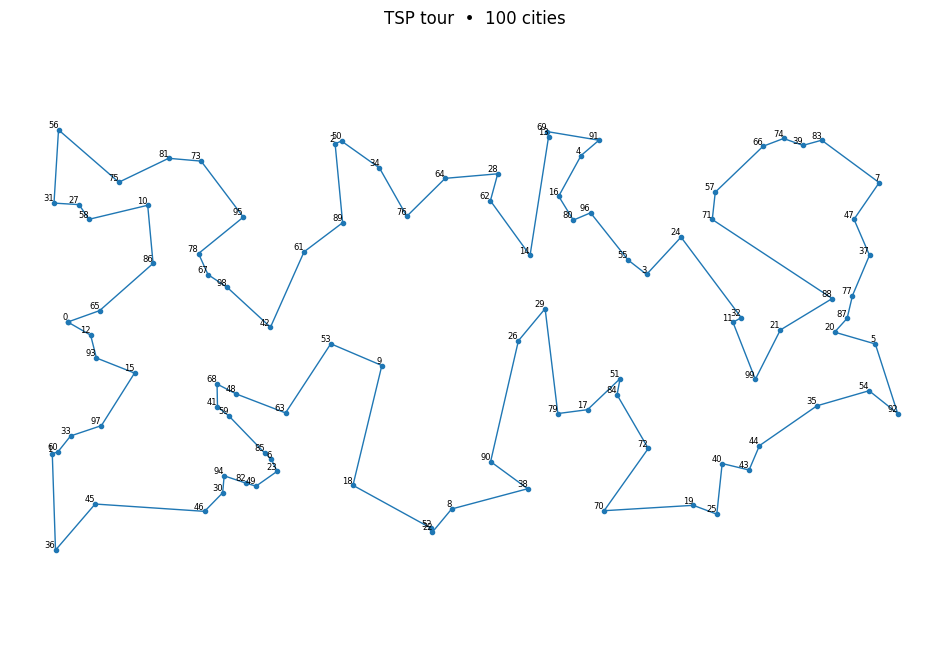

In [4]:
# choose the ID you want to see (e.g. "YQL5Q" or df.index[0])
pick = "R9hfg"

instance_path = root_in  / df.loc[pick, "file"]
tour_path     = df.loc[pick, "tour_file"]

plot_instance(instance_path, tour_path)